In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import os,sys,glob, json
import _pickle as pkl
import dlab
from tqdm.notebook import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('dark_background')

import matplotlib 
matplotlib.rcParams.update({'figure.max_open_warning': 0})

In [4]:
nwb_path = '/Users/danieljdenman/Desktop/2023-09-29_16-07-39_PaBont2.nwb'
nwb_path = '/Volumes/s2/nwbs/grant/2023-09-29_16-07-39_PaBont2.nwb'

# Load data

In [5]:
nwb = h5py.File(nwb_path,'r')

# browse with NWBwidget

In [6]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget

In [7]:
io = NWBHDF5IO(nwb_path, mode='r')
nwb_ = io.read()

nwb2widget(nwb_)

In [8]:
df_stim = nwb_.trials.to_dataframe()
df_opto = nwb_.get_time_intervals('optogenetics_states').to_dataframe()
df_units = nwb_.units.to_dataframe()

In [9]:
optogenetics_LED_state = []
for i,row in df_stim.iterrows():
    if np.min(np.abs(df_opto.start_time.values - row.start_time))<0.1:
        optogenetics_LED_state.extend([1])
    else:
        optogenetics_LED_state.extend([0])
df_stim['optogenetics_LED_state']= optogenetics_LED_state

## flash responses 
[no probes in this nwb yet having data issue with my local copy]

In [11]:
import dlab.psth_and_raster as psth
from dlab.generalephys import cleanAxes
df1=df_units

plot one unit

In [12]:
df_units[df_units.probe=='A'][df_units.label==2] # these are the "good" labelled units

/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,
29,813.996154,27.528879,3603.996154,2,2,572.8,0.0,A,"[3386.2787936926634, 3386.4762239421048, 3387...."
32,792.803147,41.666452,3582.803147,2,2,1386.1,2.4,A,"[3629.2553374850354, 3629.2592080121462, 3933...."
34,778.075075,32.093488,3568.075075,2,2,1010.5,3.0,A,"[3386.416998203919, 3387.161728179539, 3387.55..."
35,756.210150,48.650015,3546.210150,2,1,1146.8,19.5,A,"[3402.0644048621198, 3402.0902639872365, 3403...."
38,703.155128,25.058841,3493.155128,2,2,848.8,0.0,A,"[3386.1430916773625, 3386.231746768255, 3387.5..."
...,...,...,...,...,...,...,...,...,...
868,300.011540,53.000000,3090.011540,2,2,2094.0,0.0,A,"[3965.679485528516, 4701.734050515822, 4754.55..."
869,266.533415,35.082866,3056.533415,2,2,601.7,1.0,A,"[3386.1092912983468, 3386.150732631745, 3386.1..."
870,254.486232,44.463573,3044.486232,2,2,948.9,3.4,A,"[3420.303129423343, 3424.882863898088, 3426.17..."


/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


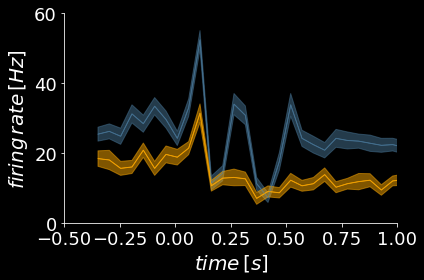

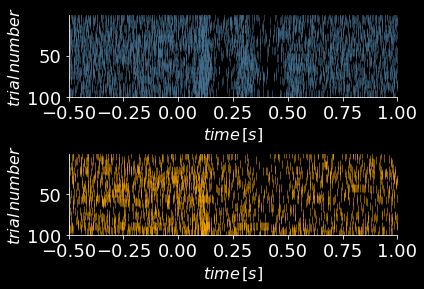

In [15]:
unit=869
df1 = df_units[df_units.probe=='A'][df_units.label==2]
f,ax=plt.subplots(1,1)
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
              ymax=60,binsize=0.05,axes=ax,color='#487697')
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values,
              ymax=60,binsize=0.05,axes=ax,color='#ffaa00')
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')

f,ax=plt.subplots(2,1)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
              axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values,
              axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
for ax_ in ax: ax_.set_xlim(-0.5,1.0)
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')

In [18]:
df1.index

Int64Index([ 29,  32,  34,  35,  38,  39,  41,  42,  43,  44,  46,  52,  53,
             57,  59,  69,  73,  77,  80,  85,  89,  90, 100, 119, 151, 153,
            154, 171, 177, 187, 191, 290, 299, 302, 308, 312, 315, 322, 348,
            350, 351, 356, 364, 378, 384, 402, 406, 412, 416, 417, 418, 419,
            525, 542, 557, 567, 578, 843, 844, 845, 846, 847, 848, 849, 850,
            851, 852, 853, 854, 855, 857, 858, 861, 862, 863, 864, 866, 867,
            868, 869, 870, 871, 872],
           dtype='int64', name='id')

/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


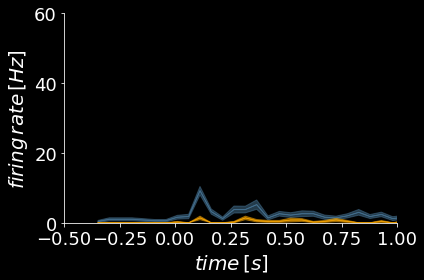

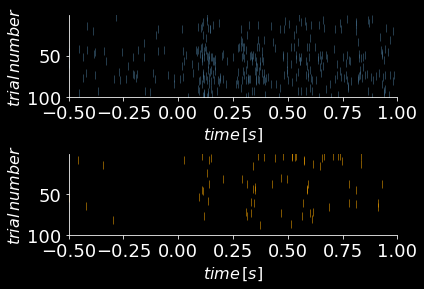

In [56]:
unit=843
df1 = df_units[df_units.probe=='A'][df_units.label==2]
f,ax=plt.subplots(1,1)
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
              ymax=60,binsize=0.05,axes=ax,color='#487697')
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values,
              ymax=60,binsize=0.05,axes=ax,color='#ffaa00')
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')

f,ax=plt.subplots(2,1)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
              axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values,
              axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
for ax_ in ax: ax_.set_xlim(-0.5,1.0)
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')

# CCGs 

In [28]:
from dlab.generalephys import ccg

In [53]:
unit1 = 869
unit2 = 843
c = ccg(df1[df1.index==unit1].spike_times.values[0],
    df1[df1.index==unit2].spike_times.values[0],
    binrange = (-500,500.0005),
    binsize=0.0005)

(-0.9, 0.9)

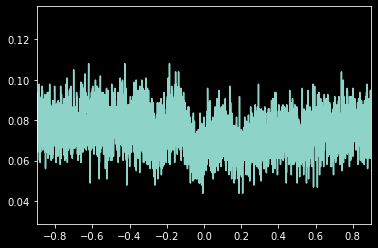

In [57]:
plt.plot(c[1][:-1],c[0])
plt.xlim(-0.90,0.9)

In [99]:
binrange = (-500,500.0005)
binsize=0.0005
numbins = int((binrange[1] - binrange[0] ) / binsize)

In [102]:
binrange = (-500,500.0005)
binsize=0.0005
numbins = int((binrange[1] - binrange[0] ) / binsize)
ccgs = np.zeros((np.shape(df1)[0],np.shape(df1)[0],numbins))

In [115]:
df1.shape[0]

83

In [116]:
for i,unit1 in tqdm(enumerate(df1.index),total=df1.shape[0]):
    for j,unit2 in tqdm(enumerate(df1.index),total=df1.shape[0]):
        if not unit1 == unit2:
            c = ccg(df1[df1.index==unit1].spike_times.values[0],
                df1[df1.index==unit2].spike_times.values[0],
                binrange = (-500,500.0005),
                binsize=0.0005)
            ccgs[i,j,:]= c[0]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

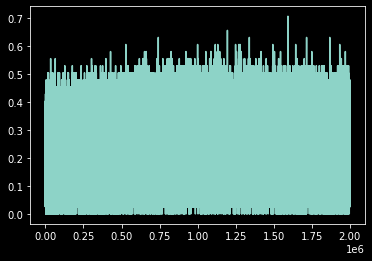

In [112]:
plt.plot(ccgs[0,3,:])

In [60]:
from phylib.stats import correlograms, firing_rate

In [70]:
st = np.load('/Volumes/DATA7/grant/rotation/2023-09-29_16-07-39_PaBont2/Record Node 103/experiment1/recording1/continuous/Neuropix-PXI-106.ProbeA-AP/spike_times.npy')
sc = np.load('/Volumes/DATA7/grant/rotation/2023-09-29_16-07-39_PaBont2/Record Node 103/experiment1/recording1/continuous/Neuropix-PXI-106.ProbeA-AP/spike_clusters.npy')

In [71]:
st

array([[      253],
       [      269],
       [      621],
       ...,
       [203412678],
       [203412703],
       [203412709]], dtype=uint64)

In [87]:
correlograms(
        st.flatten(),
        sc.flatten() ,
        cluster_ids=None, 
        sample_rate=30000,
        bin_size=5e-7, window_size=0.5, symmetrize=True)

1e-05
30000
0.30000000000000004


AssertionError: 

In [86]:
1e-5 == 0.00001

True

In [88]:
np.clip(1e-7, 1e-5, 1e5)

1e-05

In [ ]:
nwb.

# Spatiotemporal receptive fields

In [18]:
from dlab import rf_analysis as rf
stim_path = '/Volumes/DATA7/grant/rotation/2023-09-29_16-07-39_PaBont2/stim'
arbMatrix_matrix = pkl.load(open(np.sort(glob.glob(stim_path+'/*'))[0],'rb')) #this should have been put in the nwb but we forgot/didn't know
arbMatrix_matrix_o = pkl.load(open(np.sort(glob.glob(stim_path+'/*'))[1],'rb')) #this should have been put in the nwb but we forgot/didn't know


In [22]:
arbMatrix_matrix = arbMatrix_matrix.T #transpose so it is space-space-time

In [41]:
unit=869
df1 = df_units[df_units.probe=='A'][df_units.label==2]

/var/folders/ff/zqg2y83s5w72qygs0z5qq_900000gn/T/ipykernel_58283/1127891870.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe=='A'][df_units.label==2]


use this function instead of the one in the dlab because there is a dumb rounding bug when working in seconds

In [42]:
def sta(spiketimes,data,datatimes,taus=(np.linspace(-10,280,30)),exclusion=None,samplingRateInkHz=25):
    output = {}
    for tau in taus:
        avg = np.zeros(np.shape(data[:,:,0]))
        count = 0
        for spiketime in spiketimes:
            if spiketime > datatimes[0] and spiketime < datatimes[-1]-0.6:
                if exclusion is not None: #check to see if there is a period we are supposed to be ignoring, because of eye closing or otherwise
                    if spiketime > datatimes[0] and spiketime < datatimes[-1]-0.6:
                        index = (np.where(datatimes > (spiketime - tau*samplingRateInkHz))[0][0]-1) % np.shape(data)[2]
                        avg += data[:,:,index]
                else:
                    index = (np.where(datatimes > (spiketime - tau*samplingRateInkHz))[0][0]-1) % np.shape(data)[2]
                    avg += data[:,:,index]
                count+=1
        output[str(int(tau*1000))]=avg/count
    return output

an example of computing the receptive field for one unit:

In [43]:
example_sta = sta(spiketimes=df1[df1.index==unit].spike_times.values[0],
       data = arbMatrix_matrix,
       datatimes = df_stim[df_stim.stimulus=='spatioluminance_noise'].start_time.values,
       taus = (np.linspace(-0.01,.280,30)),
       samplingRateInkHz = 1.)

In [49]:
example_sta['0'] # this should be noise since it is the frame at exactly when the spike happened (no lag)

array([[126.6691544 , 126.36513413, 126.13264803, ..., 128.20713934,
        126.77645568, 127.81370133],
       [127.92100261, 125.18482011, 125.11328593, ..., 127.7242836 ,
        125.20270365, 128.70787862],
       [125.86439485, 128.31444061, 126.34725058, ..., 127.2950785 ,
        124.29064282, 129.08343308],
       ...,
       [126.36513413, 128.1534887 , 128.20713934, ..., 126.95529114,
        124.5946631 , 128.36809125],
       [129.10131662, 129.97761036, 122.94937689, ..., 126.07899739,
        126.54396958, 125.6497923 ],
       [126.2757164 , 123.46799972, 127.20566078, ..., 126.4724354 ,
        123.16397944, 126.09688094]])

an example of plotting the single example unit we just calculated

/Users/danieldenman/opt/anaconda3/lib/python3.9/site-packages/dlab/rf_analysis.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


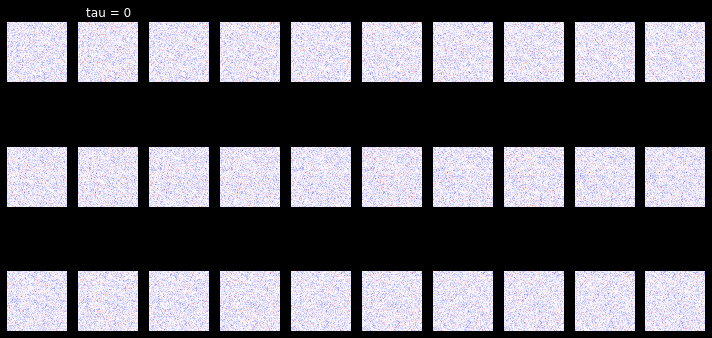

In [48]:
rf.plotsta(example_sta,colorrange=(100,156))